216 409 25


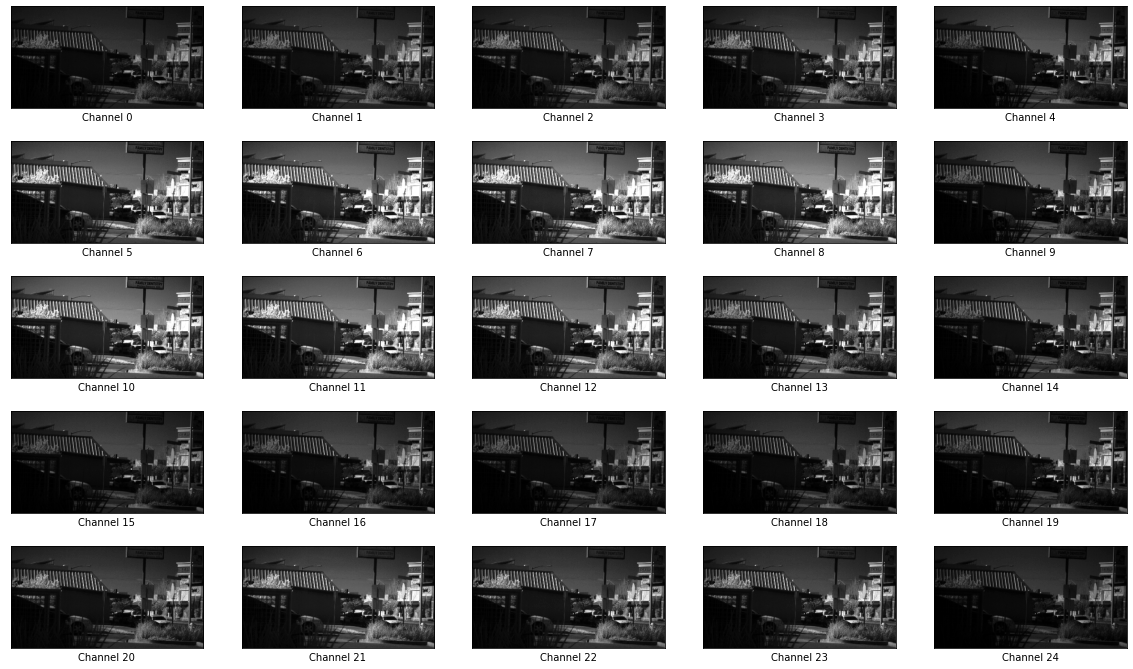

In [66]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


hs_img = np.load('./ex_hs_img.npy')
H, W, C = hs_img.shape
print(H, W, C)

plt.figure(figsize=(20, 12))
for n in range(25):
    plt.subplot(5, 5, n+1)
    plt.imshow(hs_img[:,:,n], cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Channel {n}')
plt.show()

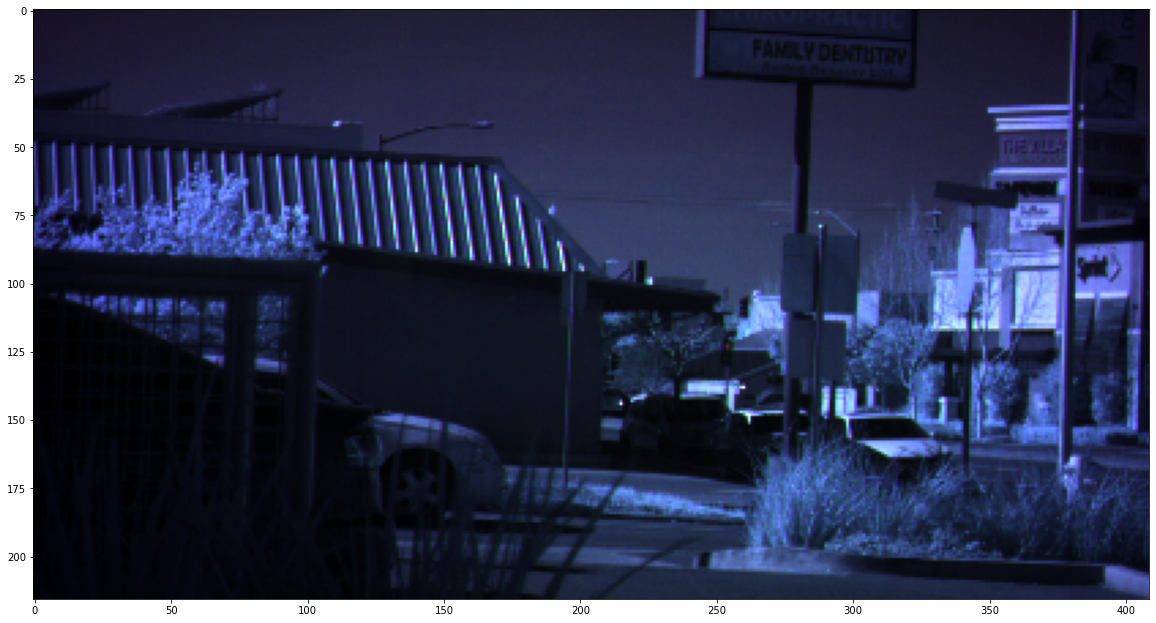

In [67]:
plt.figure(figsize=(20, 12))
ld_img = np.zeros((H, W, 3), dtype=np.uint8)
ld_img[:, :, 0] = hs_img[:, :, 1]
ld_img[:, :, 1] = hs_img[:, :, 3]
ld_img[:, :, 2] = hs_img[:, :, 6]
plt.imshow(ld_img)
plt.show()

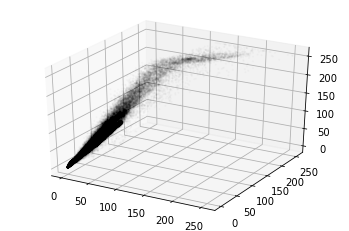

In [73]:
R = ld_img[:, :, 0].flatten()
G = ld_img[:, :, 1].flatten()
B = ld_img[:, :, 2].flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B, marker='o', s=2, alpha=.01, c='k')
plt.show()

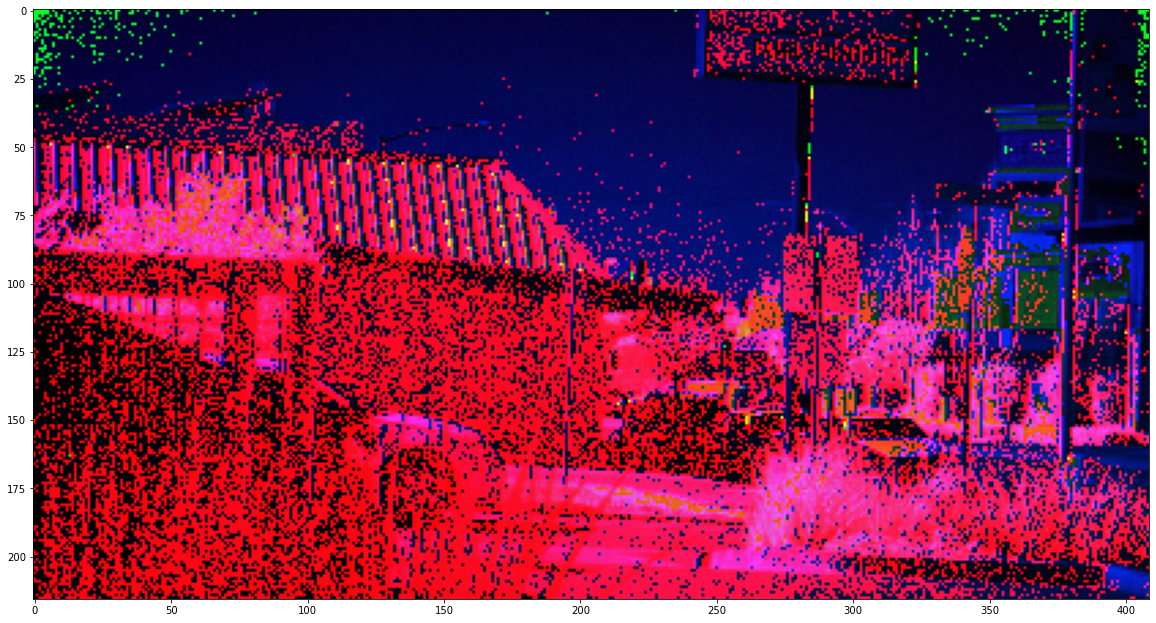

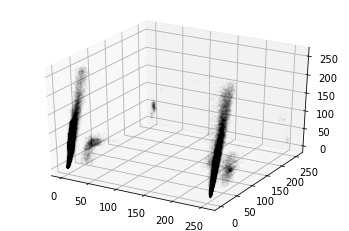

In [74]:
plt.figure(figsize=(20, 12))
ld_img = np.zeros((H, W, 3), dtype=np.uint8)
ld_img[:, :, 0] = hs_img[:, :, 1] - hs_img[:, :, 2]
ld_img[:, :, 1] = hs_img[:, :, 3] - 0.7 * hs_img[:, :, 4]
ld_img[:, :, 2] = hs_img[:, :, 6] + .3 * hs_img[:, :, 5] - .2 * hs_img[:, :, 9]
plt.imshow(ld_img)
plt.show()

R = ld_img[:, :, 0].flatten()
G = ld_img[:, :, 1].flatten()
B = ld_img[:, :, 2].flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B, marker='o', s=2, alpha=.01, c='k')
plt.show()

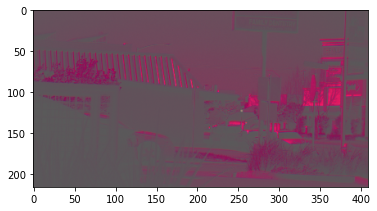

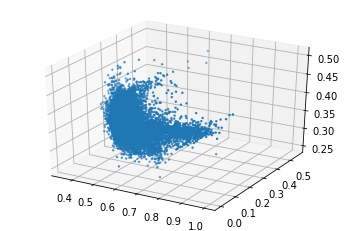

In [91]:
comp_R = np.random.normal(size=25)
comp_G = np.random.normal(size=25)
comp_B = np.random.normal(size=25)


ld_img = np.zeros((H, W, 3))
for n in range(25):
    ld_img[:, :, 0] += comp_R[n] * hs_img[:, :, n] 
    ld_img[:, :, 1] += comp_G[n] * hs_img[:, :, n] 
    ld_img[:, :, 2] += comp_B[n] * hs_img[:, :, n]
ld_img -= ld_img.min()
ld_img /= ld_img.max()
plt.imshow(ld_img)
plt.show()

R = ld_img[:, :, 0].flatten()
G = ld_img[:, :, 1].flatten()
B = ld_img[:, :, 2].flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B, marker='o', s=2)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[-0.55216547  0.1359157  -0.16123853  0.5990364  -0.14523619  0.81498665
   0.8990868  -0.08986586 -0.08083394  2.24896307 -1.27501671 -1.01776578
   0.23692307 -1.23743954 -0.44267246  0.03113849  0.82020825 -0.45378291
  -0.62258668  1.12389993 -0.00326742  0.15627429 -0.28189807  2.40723243
  -2.84773787]
 [ 1.47518869 -0.20332076  1.26872139  1.41603022 -0.11046218 -0.00995964
   0.80435921  1.88800121 -0.32968525  0.83960782 -0.48572312 -0.75134211
  -1.14356244 -0.08381693 -0.26703071 -0.0826735  -1.2743553  -1.29206897
   0.29684375  0.06915271  0.04496957 -0.97865172  1.32419451 -0.96181628
   1.91307131]
 [-0.05054287 -0.85507733 -0.23672904 -0.6695999  -0.79746941 -0.92070355
  -0.35715425  2.06111943 -0.17652125 -0.10172936 -0.29732066 -0.05711163
   1.27538412  0.37575224  0.94141032 -0.41899481  0.09191758  0.69671108
   0.51145958  0.97714192 -0.11686674 -0.94301611 -0.33686686 -0.87275061
  -0.63288663]]


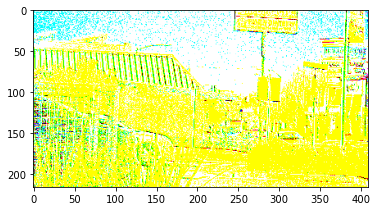

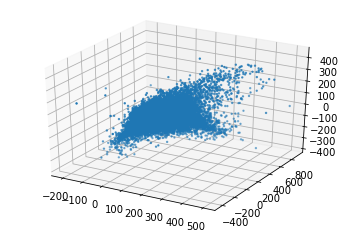

In [96]:
def projection(components):
    ld_img = np.zeros((H, W, 3))
    for n in range(25):
        ld_img[:, :, 0] += components[0, n] * hs_img[:, :, n] 
        ld_img[:, :, 1] += components[1, n] * hs_img[:, :, n] 
        ld_img[:, :, 2] += components[2, n] * hs_img[:, :, n] 

    plt.imshow(ld_img)
    plt.show()

    R = ld_img[:, :, 0].flatten()
    G = ld_img[:, :, 1].flatten()
    B = ld_img[:, :, 2].flatten()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(R, G, B, marker='o', s=2)
    plt.show()
    
components = np.random.normal(size=(3,25))
print(components)
projection(components)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 1.15580389e-01  1.43771028e-01  1.47707446e-01  1.77706877e-01
   1.41960226e-01  2.58997349e-01  2.97784163e-01  2.95588191e-01
   3.01351028e-01  1.64781667e-01  2.70978654e-01  2.87672295e-01
   2.66141960e-01  2.10654122e-01  1.63663450e-01  1.24850186e-01
   1.38231897e-01  1.26866736e-01  1.12284138e-01  1.11560726e-01
   1.65343641e-01  2.16587970e-01  1.89574784e-01  1.89432250e-01
   1.05993931e-01]
 [-8.06233660e-02 -1.03600921e-02  5.79964450e-05  1.02324317e-01
   3.43288929e-01 -3.07631973e-01 -3.11737692e-01 -8.03824551e-02
   9.09123595e-02  3.65794803e-01 -2.10791601e-01 -1.91015218e-01
   4.34889498e-02  2.42518337e-01  3.73349129e-01  3.17599923e-02
   6.60267139e-02  1.22639733e-01  1.74118125e-01  2.87374152e-01
  -1.92379420e-01 -1.65707575e-01 -3.81967844e-02  7.74321534e-02
   1.96152199e-01]
 [ 1.08130387e-01  7.01161905e-02 -1.40928967e-01 -3.00689152e-01
   4.14813497e-02  1.35055203e-01 -2.18082046e-01 -3.17857613e-01
  -4.45287126e-01  4.18479758e-02  3.1

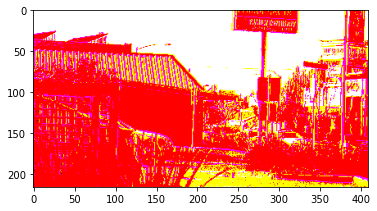

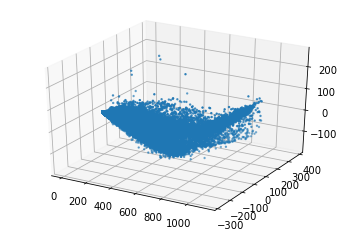

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True)
hs_img_flat = hs_img.reshape((-1, 25))
pca.fit(hs_img_flat)
print(pca.components_)

projection(pca.components_)


In [64]:
def normalize_img(img, q=0, axis=None):
    m = np.quantile(img, q, axis=axis)
    M = np.quantile(img, 1-q, axis=axis)
    norm_img = (img - m) / (M - m)
    norm_img[norm_img > 1] = 1
    norm_img[norm_img < 0] = 0
    return norm_img
def unnormed_lab2rgb(ulab, q=0):
    lab = normalize_img(ulab, q=q, axis=(0, 1))

    AB_range = 100

    lab *= np.array([[ [100, 2*AB_range, 2*AB_range] ]])
    lab -= np.array([[ [0, AB_range, AB_range] ]])

    return lab2rgb(lab)



In [ ]:
def projection(components):
    ld_img = np.zeros((H, W, 3))
    for n in range(25):
        ld_img[:, :, 0] += components[0, n] * hs_img[:, :, n] 
        ld_img[:, :, 1] += components[1, n] * hs_img[:, :, n] 
        ld_img[:, :, 2] += components[2, n] * hs_img[:, :, n] 

    ld_img -= ld_img.min()
    ld_img /= ld_img.max()
    plt.imshow(ld_img)
    plt.show()

    R = ld_img[:, :, 0].flatten()
    G = ld_img[:, :, 1].flatten()
    B = ld_img[:, :, 2].flatten()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(R, G, B, marker='o', s=2)
    plt.show()